# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

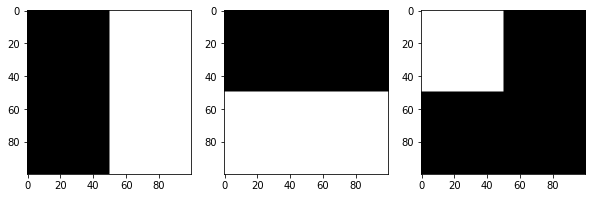

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


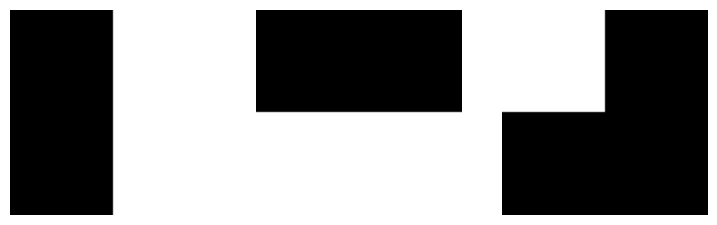

In [4]:
# solution
def img1():
    img = np.ones((100, 100), dtype=np.uint8) * 255
    img[:, :50] = 0
    return img

def img2():
    img = np.ones((100, 100), dtype=np.uint8) * 255
    img[:50, :] = 0
    return img

def img3():
    img = np.zeros((100, 100), dtype=np.uint8)
    img[:50, :50] = 255
    return img

images = [img1(), img2(), img3()]

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, img in zip(axes, images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.show()


*   Use the above three images to create the following image

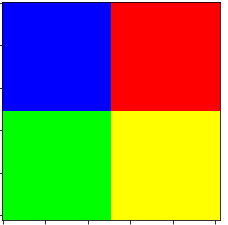
*Hint: Remember channels and color spaces*

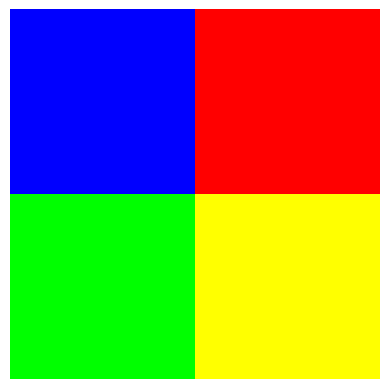

In [6]:
# solution
import numpy as np
import matplotlib.pyplot as plt

def image():
    img = np.zeros((100, 100, 3), dtype=np.uint8)

    blue = [0, 0, 255]
    red = [255, 0, 0]
    green = [0, 255, 0]
    yellow = [255, 255, 0]

    img[:50, :50] = blue
    img[:50, 50:] = red
    img[50:, :50] = green
    img[50:, 50:] = yellow

    return img

new_image = image()

plt.imshow(new_image)
plt.axis('off')
plt.show()



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

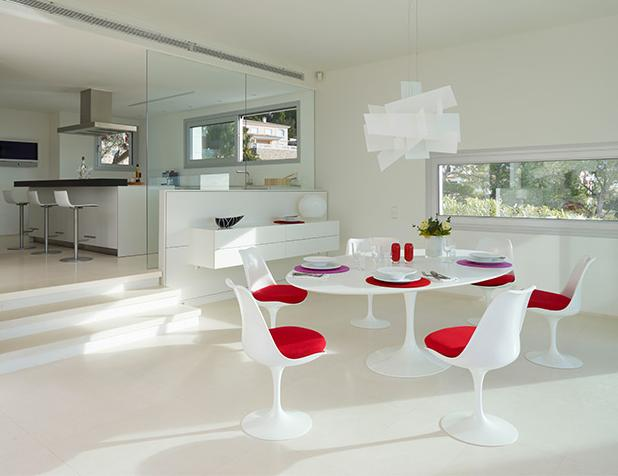

*   Extract individual channels and plot them using matplotlib subplot.



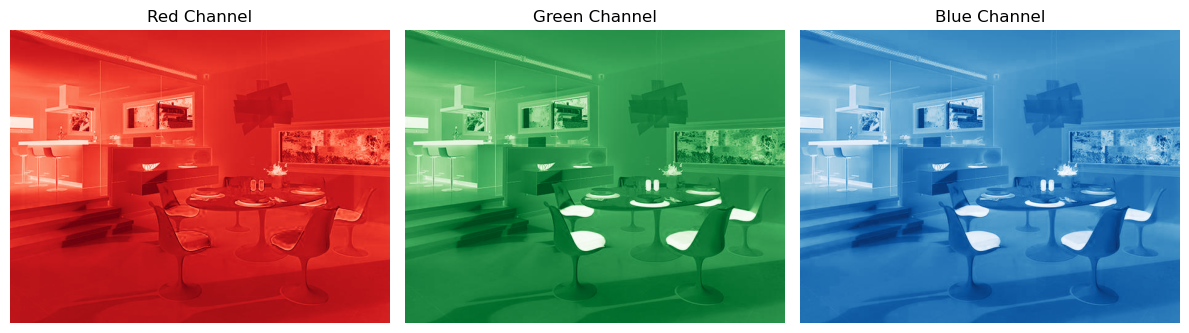

In [3]:
# solution
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/sillas.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(image_rgb)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

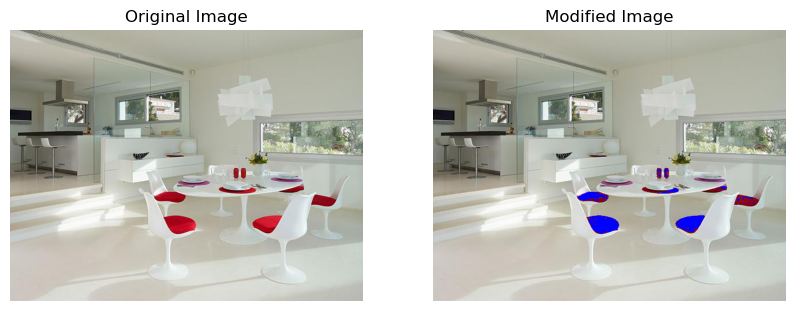

In [7]:
# solution
import skimage.io as io

img = io.imread("images/sillas.jpg")

img_modified = img.copy()
red_pixels = (img[:, :, 0] > 150) & (img[:, :, 1] < 100) & (img[:, :, 2] < 100)
img_modified[red_pixels] = [0, 0, 255]  # تغيير الأحمر إلى أزرق

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(img_modified)
axes[1].set_title("Modified Image")
axes[1].axis("off")

plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

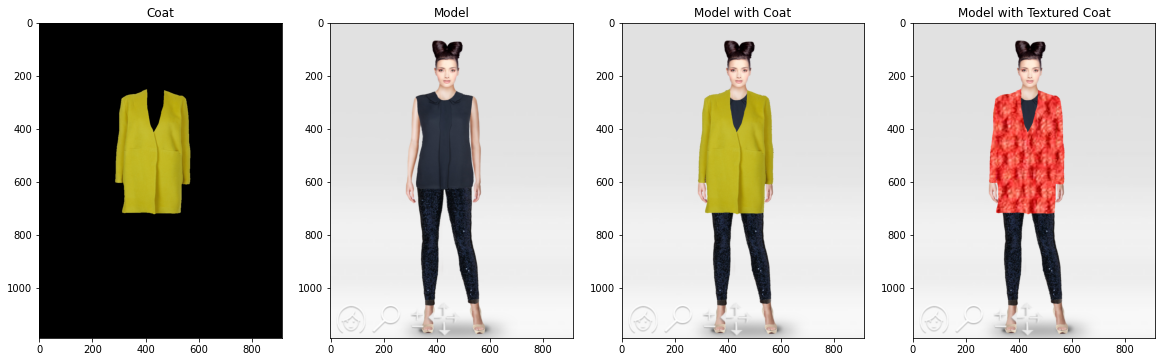

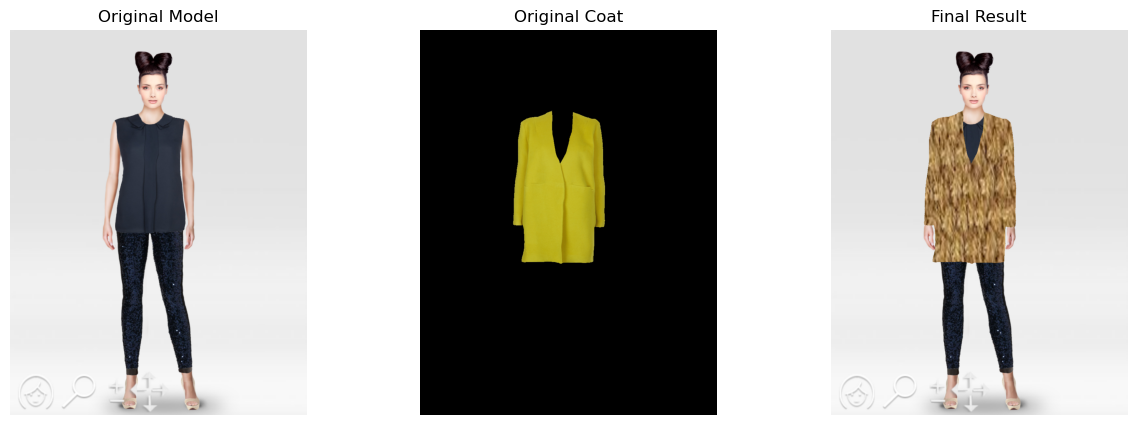

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
model = cv2.imread("images/model.png")
coat = cv2.imread("images/coat.png")
texture = cv2.imread("images/texture.png")

# Convert images from BGR to RGB for correct display
model = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)
coat = cv2.cvtColor(coat, cv2.COLOR_BGR2RGB)
texture = cv2.cvtColor(texture, cv2.COLOR_BGR2RGB)

# Convert coat image to grayscale to create a mask
coat_gray = cv2.cvtColor(coat, cv2.COLOR_RGB2GRAY)

# Apply threshold to get a binary mask
_, mask = cv2.threshold(coat_gray, 1, 255, cv2.THRESH_BINARY)

# Resize the texture image to match the coat size
texture = cv2.resize(texture, (coat.shape[1], coat.shape[0]))

# Blend the texture with the coat using the mask
coat_with_texture = np.where(mask[..., None] == 255, texture, coat)

# Merge the coat with the model using the mask
model_with_coat = np.where(mask[..., None] == 255, coat_with_texture, model)

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(model)
ax[0].set_title("Original Model")
ax[0].axis("off")

ax[1].imshow(coat)
ax[1].set_title("Original Coat")
ax[1].axis("off")

ax[2].imshow(model_with_coat)
ax[2].set_title("Final Result")
ax[2].axis("off")

plt.show()



# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




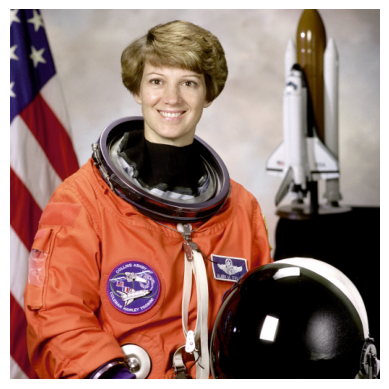

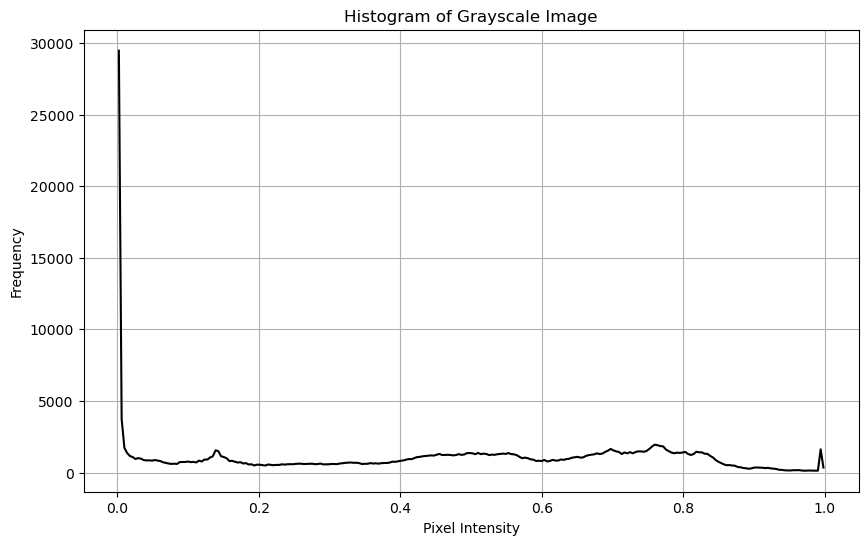

In [6]:
# solution
from skimage import io, color
from skimage.exposure import histogram
from skimage import data

astronaut_image = data.astronaut()

plt.imshow(astronaut_image)
plt.axis('off')
plt.show()

gray_image = color.rgb2gray(astronaut_image)

hist, bin_centers = histogram(gray_image)

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

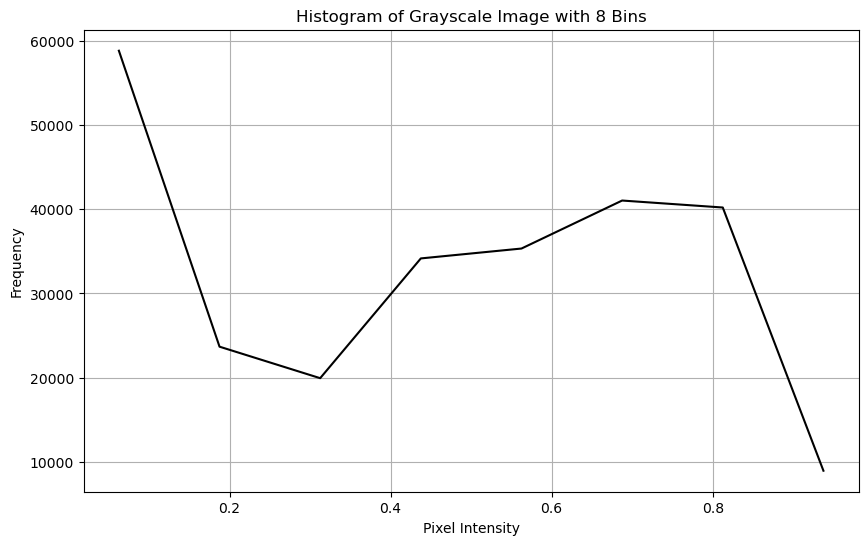

In [8]:
# solution
hist_8bins, bin_centers_8bins = histogram(gray_image, nbins=8)

plt.figure(figsize=(10, 6))
plt.plot(bin_centers_8bins, hist_8bins, color='black')
plt.title('Histogram of Grayscale Image with 8 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*
Changing the bin count in a histogram affects how the pixel values are grouped. If the bin count is low, fewer bins are used, so the histogram becomes more general and may hide some details in the image. If the bin count is high, more bins are used, showing finer details but possibly making the histogram noisier.

The correct bin count depends on the image and the level of detail you want to see. Typically, a higher bin count gives a more detailed histogram, but too many bins can make it harder to interpret. A lower bin count may lose important details but can make the histogram easier to understand. The bin count should balance between showing enough detail and not being too noisy.
...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


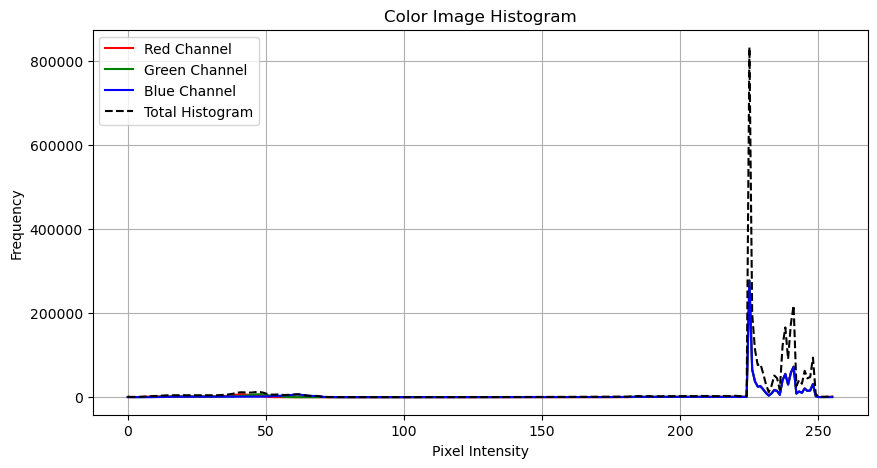

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread("images/model.png")

# Convert from BGR to RGB for correct color representation
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define colors for plotting (Red, Green, Blue)
colors = ('r', 'g', 'b')
channel_labels = ('Red', 'Green', 'Blue')

# Create a figure
plt.figure(figsize=(10, 5))

# Compute and plot histogram for each color channel
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])  # Compute histogram
    plt.plot(hist, color=color, label=f"{channel_labels[i]} Channel")  # Plot histogram

# Compute total histogram by summing all channels
total_hist = cv2.calcHist([image], [0], None, [256], [0, 256]) + \
             cv2.calcHist([image], [1], None, [256], [0, 256]) + \
             cv2.calcHist([image], [2], None, [256], [0, 256])

# Plot total histogram in black
plt.plot(total_hist, color="black", linestyle="--", label="Total Histogram")

# Configure plot settings
plt.title("Color Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



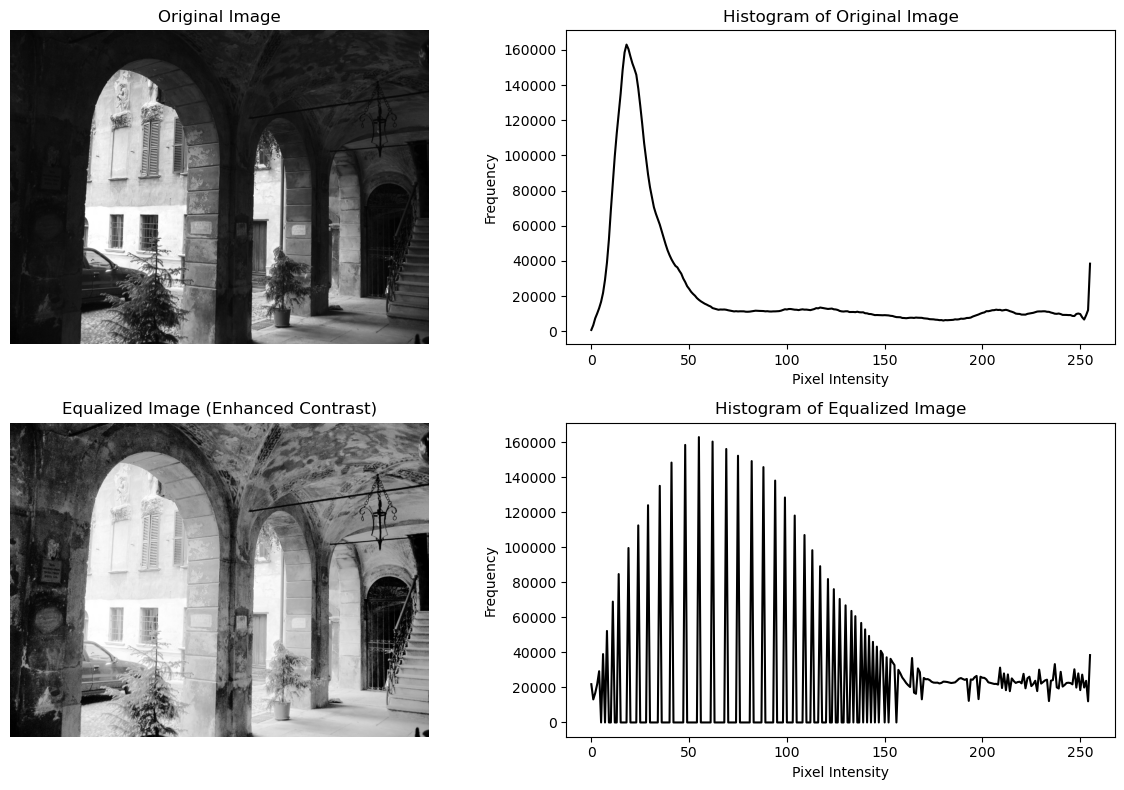

In [15]:
# solution
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Load the image in grayscale
image = cv2.imread("images/aquatermi_lowcontrast.jpg", cv2.IMREAD_GRAYSCALE)

# Compute the histogram of the original image
hist_original, bins = np.histogram(image.flatten(), 256, [0, 256])

# Perform histogram equalization
equalized_image = exposure.equalize_hist(image)

# Compute the histogram of the equalized image
hist_equalized, bins_eq = np.histogram(equalized_image.flatten(), 256, [0, 1])

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Display original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Display histogram of the original image
axes[0, 1].plot(hist_original, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

# Display equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title("Equalized Image (Enhanced Contrast)")
axes[1, 0].axis("off")

# Display histogram of the equalized image
axes[1, 1].plot(hist_equalized, color='black')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*
Changing the radius of the disk affects how much smoothing is applied to the image. A larger radius means that more surrounding pixels are considered when averaging the pixel value, which results in stronger smoothing. This helps to remove noise, but it can also blur fine details in the image. On the other hand, a smaller radius will smooth the image less, keeping more details but possibly leaving some noise.
...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



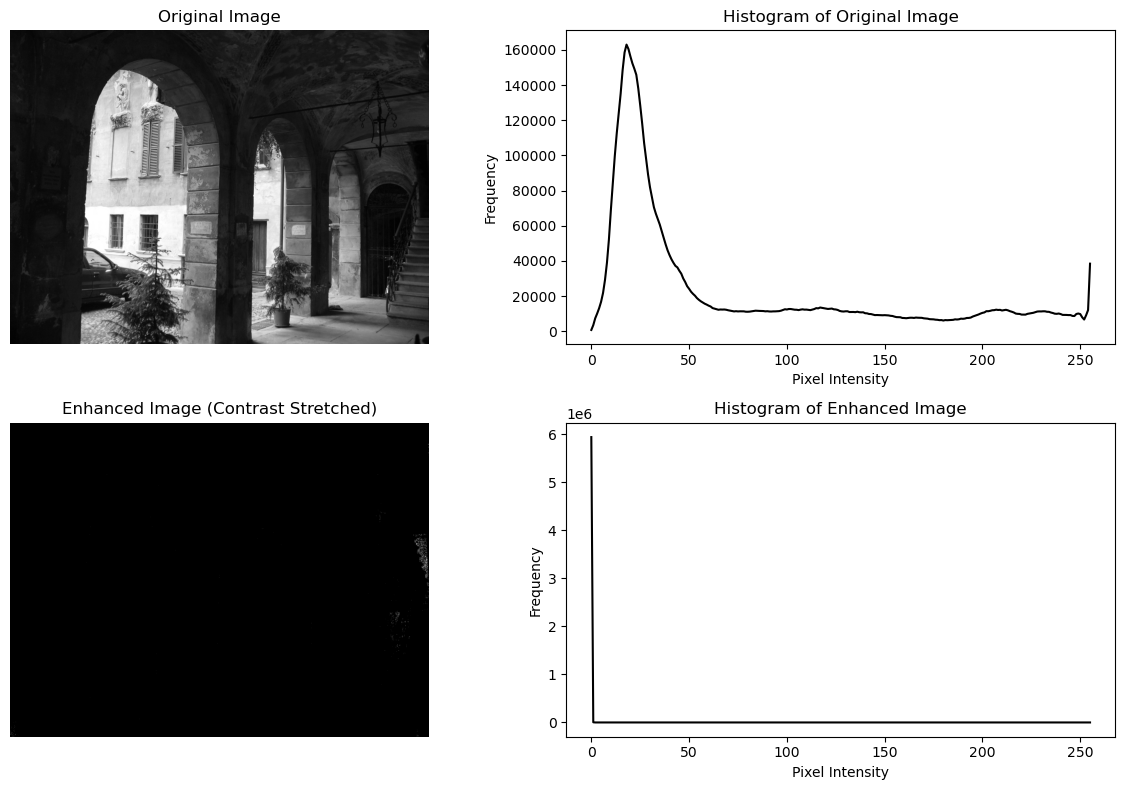

In [17]:
# solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

def linear_contrast_stretch(image):

    I_min, I_max = np.min(image), np.max(image)
    
    stretched_image = ((image - I_min) * 255 / (I_max - I_min)).astype(np.uint8)
    
    return stretched_image

image = cv2.imread("images/aquatermi_lowcontrast.jpg", cv2.IMREAD_GRAYSCALE)

hist_original, bins_original = np.histogram(image.flatten(), 256, [0, 256])

enhanced_image = linear_contrast_stretch(image)

hist_enhanced, bins_enhanced = np.histogram(enhanced_image.flatten(), 256, [0, 256])

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].plot(hist_original, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title("Enhanced Image (Contrast Stretched)")
axes[1, 0].axis("off")

axes[1, 1].plot(hist_enhanced, color='black')
axes[1, 1].set_title("Histogram of Enhanced Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




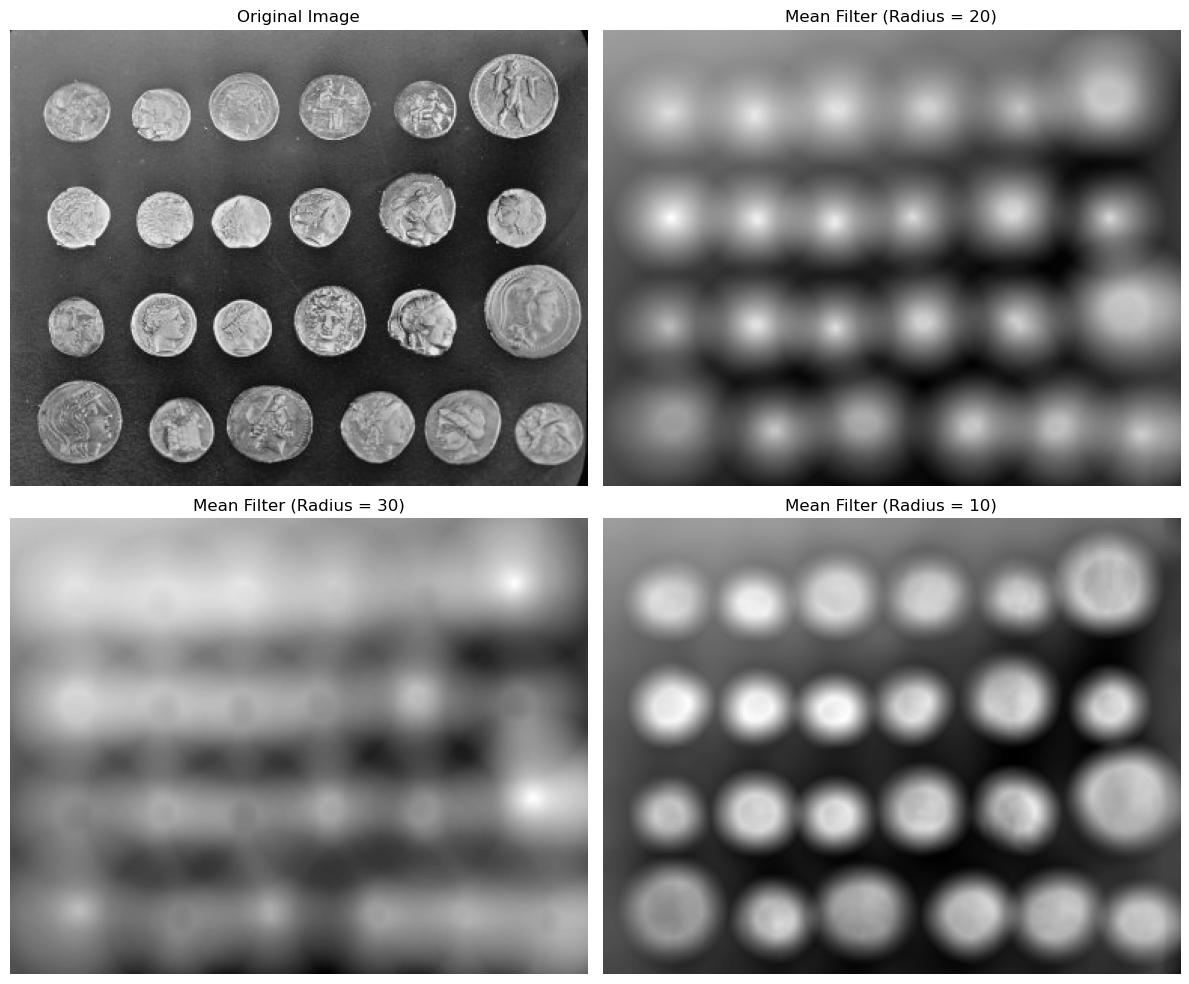

In [19]:
# solution
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte
from skimage.filters.rank import mean
from skimage.morphology import disk

# Load the coins image
image = img_as_ubyte(data.coins())

# Define disk structuring elements with different radii
selem_20 = disk(20)  # Radius = 20
selem_30 = disk(30)  # Radius = 30 (increased)
selem_10 = disk(10)  # Radius = 10 (decreased)

# Apply Mean Filter with different structuring elements
filtered_20 = mean(image, selem_20)
filtered_30 = mean(image, selem_30)
filtered_10 = mean(image, selem_10)

# Create subplots to visualize all images
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Display Original Image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Display Mean Filtered Image (Radius = 20)
axes[0, 1].imshow(filtered_20, cmap='gray')
axes[0, 1].set_title("Mean Filter (Radius = 20)")
axes[0, 1].axis("off")

# Display Mean Filtered Image (Radius = 30)
axes[1, 0].imshow(filtered_30, cmap='gray')
axes[1, 0].set_title("Mean Filter (Radius = 30)")
axes[1, 0].axis("off")

# Display Mean Filtered Image (Radius = 10)
axes[1, 1].imshow(filtered_10, cmap='gray')
axes[1, 1].set_title("Mean Filter (Radius = 10)")
axes[1, 1].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

C:\Users\renad\AppData\Local\Temp\ipykernel_19320\3217222974.py:13: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Square (15x15)": square(15),
C:\Users\renad\AppData\Local\Temp\ipykernel_19320\3217222974.py:14: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Rectangle (10x20)": rectangle(10, 20),


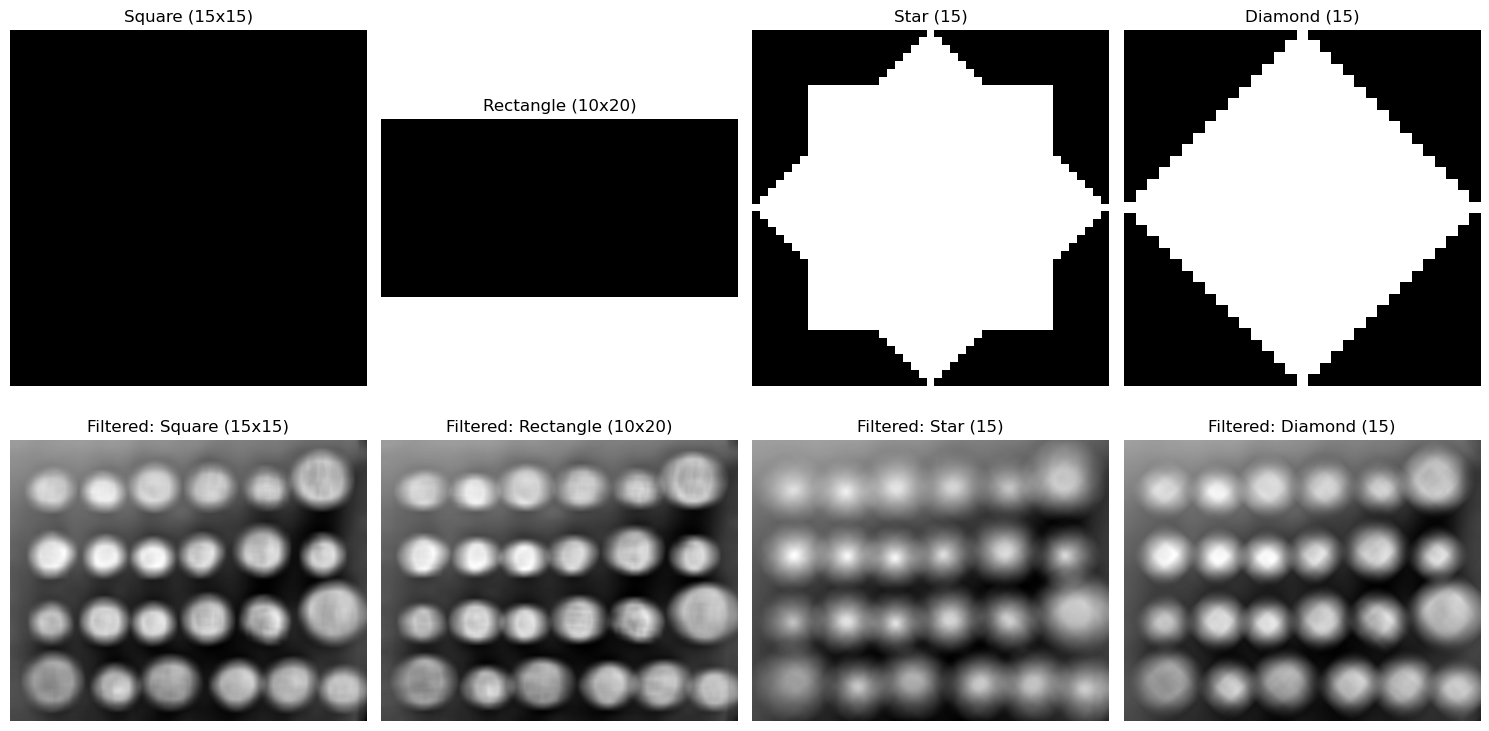

In [21]:
# solution
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte
from skimage.filters.rank import mean
from skimage.morphology import square, rectangle, star, diamond

# Load the coins image
image = img_as_ubyte(data.coins())

# Define different structuring elements
selems = {
    "Square (15x15)": square(15),
    "Rectangle (10x20)": rectangle(10, 20),
    "Star (15)": star(15),
    "Diamond (15)": diamond(15),
}

# Apply Mean Filter using different structuring elements
filtered_images = {name: mean(image, selem) for name, selem in selems.items()}

# Create a 2 x n subplot to visualize selem and corresponding smoothed images
fig, axes = plt.subplots(2, len(selems), figsize=(15, 8))

# Display structuring elements
for i, (name, selem) in enumerate(selems.items()):
    axes[0, i].imshow(selem, cmap="gray")
    axes[0, i].set_title(name)
    axes[0, i].axis("off")

# Display corresponding filtered images
for i, (name, filtered) in enumerate(filtered_images.items()):
    axes[1, i].imshow(filtered, cmap="gray")
    axes[1, i].set_title(f"Filtered: {name}")
    axes[1, i].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()




*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*
Changing the radius of the disk affects the level of smoothing applied to the image. A larger radius means that more surrounding pixels will be averaged, leading to stronger smoothing and removing more noise, but it can also blur fine details.
...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*
The structuring element defines the shape and size of the neighborhood used during operations like erosion and dilation. Changing the shape can alter how the image is processed. The size of the element also determines the degree of change: larger elements can have a greater effect on the image, smoothing it more or filling larger gaps. ...
...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*
The mean filter is a simple filter that replaces the value of each pixel with the average of its surrounding pixels. It is commonly used to remove random noise from an image but can cause blurring of edges, as it treats all neighboring pixels equally without considering their position relative to the target pixel. On the other hand, the Gaussian filter works differently by using a Gaussian distribution, where pixels closer to the center of the filter have a higher weight in the calculation. This results in smoother noise reduction while preserving edges better compared to the mean filter.
...